# Cost functions and optimization

### Machine Learning, CSC630, Winter 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_regression, make_classification

plt.style.use('fivethirtyeight')

%matplotlib inline

# make a regression dataset:
X,y  = make_regression(n_samples=50, n_features=1, n_informative=1, noise=30, random_state=6)
X += abs(X.min()) + 1
y += abs(y.min()) + 1
y_s = y**3

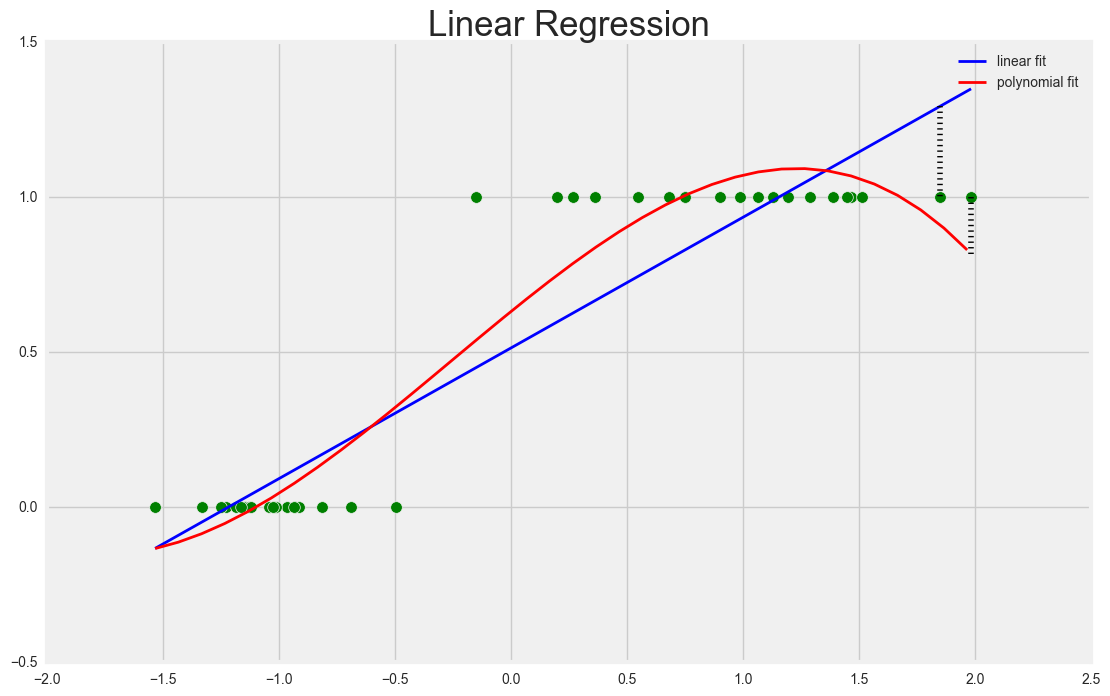

In [3]:
# Create two lines of best fit: one straight, and one curved
model_1 = LinearRegression()
model_1.fit(X, y**3)
f_model_1 = lambda x: model_1.coef_[0] * x + model_1.intercept_

model_2 = LinearRegression()
model_2.fit(np.concatenate([X**3, X**2, X], axis=1), y**3)
f_model_2 = lambda x: model_2.coef_[0] * x**3 + model_2.coef_[1] * x**2 + model_2.coef_[2] * x + model_2.intercept_

# x_1, y_1 = sorted(zip(X.T[0],y), key=lambda x: x[0])[-2]
(x_1, y_1), (x_2, y_2) = sorted(zip(X.T[0],y), key=lambda x: x[0])[-2:]

plt.figure(figsize=(12,8))
plt.scatter(X, y**3, c='g', s=70)
plt.title('Linear Regression', fontsize=25)
plt.plot([X.min(),X.max()], [f_model_1(X.min()), f_model_1(X.max())], c='b', linewidth=2, label="linear fit")
plt.plot(np.arange(X.min(), X.max(), 0.1), [f_model_2(i) for i in np.arange(X.min(), X.max(), 0.1)], 
         c='r', linewidth=2, label="polynomial fit")
plt.plot([x_1, x_1], [f_model_1(x_1), y_1**3], 'k:')
plt.plot([x_2, x_2], [f_model_2(x_2), y_2**3], 'k:')
plt.legend();


The linear regression equation fit by the model is:

$$ y = {\color{green} m_1} \cdot x + {\color{orange} b},$$

where we must find the best ${\color{green} m_1}$ and ${\color{orange} b}$ (the **parameters** of the model).  More generally, we fit a hyperplane to our data:

$$ y = {\color{green} m_1} \cdot x_1 + {\color{green} m_2} \cdot x_2 + \ldots + {\color{green} m_p} \cdot x_p + {\color{orange} b},$$

if we have $p$ features/predictors/columns (and then there's polynomial fitting, like you see above.  For that, add polynomial terms to your hyperplane) .  The cost function for linear regression is the **Residual Sum of Squares**:

$$RSS = \sum_{i=1}^n(y_i - \widehat{y_i})^2$$

A more standardized, but equaivalent cost function is the **Root Mean Squared Error**:

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i - \widehat{y_i})^2}$$

The **error terms** are the length of the small vertical dotted lines pictured above.

# New Model: Logistic Regression

One of the simplest "linear" models for classification is **Logistic Regression**.  This model fits (regresses) a *logistic* curve to data in a classification problem, which is interpretted as a probability.

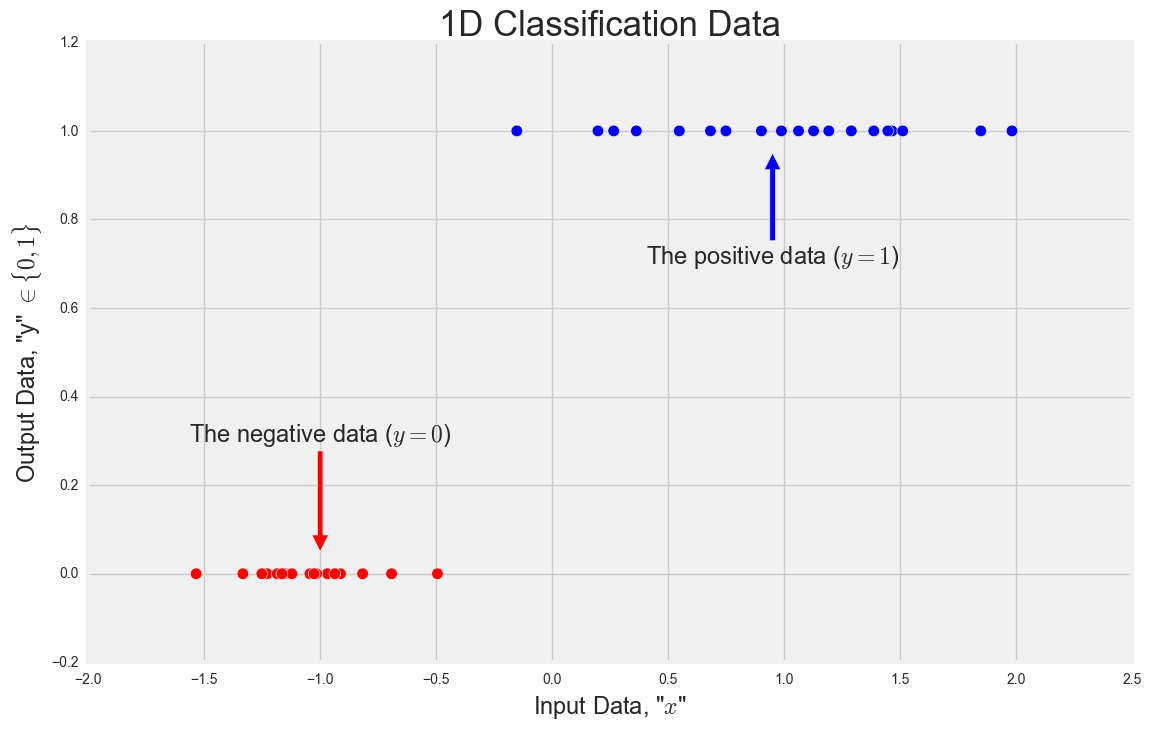

In [4]:
X, y = make_classification(n_samples=40, n_features=1, n_classes=2, n_clusters_per_class=1, 
                           n_informative=1, n_redundant=0, n_repeated=0, random_state=6)

plt.figure(figsize=(12,8))
plt.scatter(X, y, c=['r' if i==0 else 'b' for i in y], s=70)

# point out the data groupings
plt.annotate('The positive data ($y=1$)', xy=(0.95, 0.95), xytext=(0.95, 0.7), 
             arrowprops=dict(facecolor='blue'), horizontalalignment='center', fontsize=17) 
plt.annotate('The negative data ($y=0$)', xy=(-1.0, 0.05), xytext=(-1.0, 0.3), 
             arrowprops=dict(facecolor='red'), horizontalalignment='center', fontsize=17) 
plt.xlabel('Input Data, "$x$"', fontsize=17)
plt.ylabel('Output Data, "y" $\in \{0,1\}$', fontsize=17)
plt.title("1D Classification Data", fontsize=25);

A logistic function has the nice property that all of its outputs are in the range $(0,1)$, and so they can be interpretted as probabilities:

$$y = \frac{1}{1+e^{-\left({\color{green} m} x +{\color{orange} b}\right) }},$$

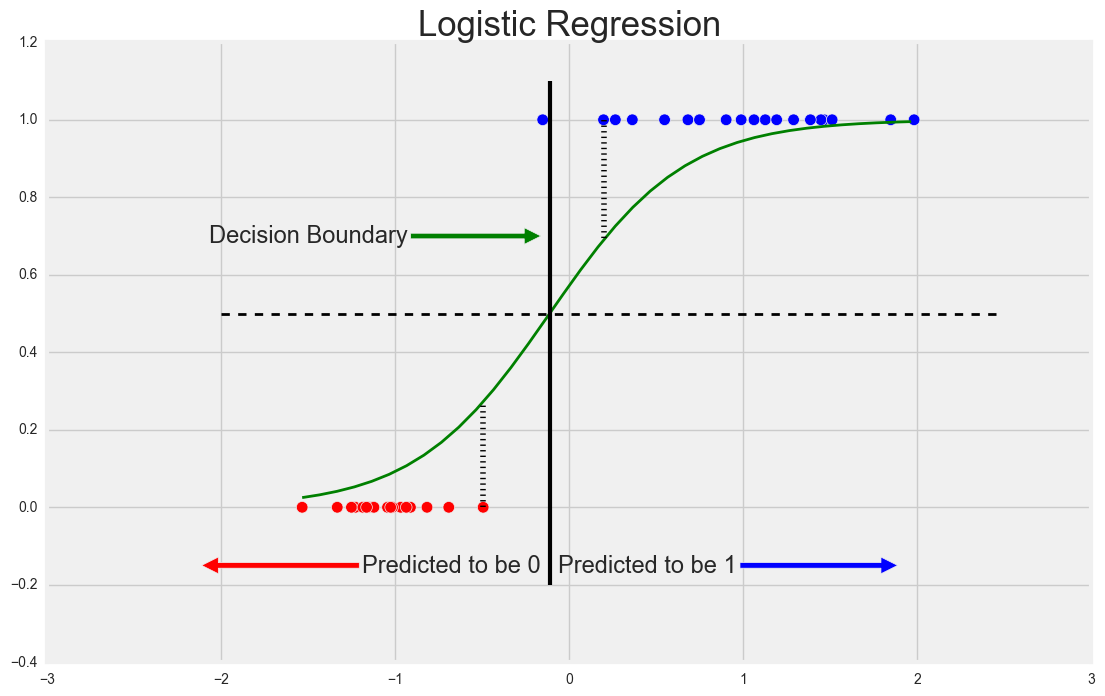

In [5]:
# Try adding C=1000000000000 in the call to LogisticRegression to force the regularization term to vanish

model = LogisticRegression().fit(X,y)
f_model = lambda x: 1/(1+np.exp(-(model.coef_[0]*x + model.intercept_))) 


fig = plt.figure(figsize=(12,8))
plt.scatter(X, y, c=['r' if i==0 else 'b' for i in y], s=70)
plt.plot(np.arange(X.min(), X.max(), 0.1), [f_model(i) for i in np.arange(X.min(), X.max(), 0.1)], 
         c='g', linewidth=2)

# plot the decision boundary
edges = fig.get_axes()[0].get_xlim()
plt.plot(edges, [0.5, 0.5], 'k--', linewidth=2)

boundary = -model.intercept_/model.coef_[0]
plt.plot([boundary, boundary], [-0.2, 1.1], 'k', linewidth=3)

# point out the decision boundary
plt.annotate('Decision Boundary', xy=(boundary - 0.05, 0.7), xytext=(-1.5, 0.7), 
             arrowprops=dict(facecolor='green'), horizontalalignment='center', 
             verticalalignment='center', fontsize=17) 
plt.annotate('Predicted to be 0', xy=(boundary - 2, -0.15), xytext=(boundary - 0.05, -0.15), 
             arrowprops=dict(facecolor='red'), horizontalalignment='right', 
             verticalalignment='center', fontsize=17) 
plt.annotate('Predicted to be 1', xy=(boundary + 2, -0.15), xytext=(boundary + 0.05, -0.15), 
             arrowprops=dict(facecolor='blue'), horizontalalignment='left', 
             verticalalignment='center', fontsize=17) 

# plot two error terms
x_1, y_1 = [pair for pair in sorted(zip(X.T[0],y), key=lambda x: x[0]) if pair[1] == 0][-1]
plt.plot([x_1,x_1],[y_1,f_model(x_1)], 'k:')

x_2, y_2 = [pair for pair in sorted(zip(X.T[0],y), key=lambda x: x[0]) if pair[1] == 1][1]
plt.plot([x_2,x_2],[y_2,f_model(x_2)], 'k:')

# # What if we graphed the "wrong" logistic curve? What would that look like?  Uncomment these to find out!
# bad_model_1 = lambda x: 1/(1+np.exp(-5*x-1.5))
# bad_model_2 = lambda x: 1/(1+np.exp((model.coef_[0]*x + model.intercept_+1))) 

# plt.plot(np.arange(X.min(), X.max(), 0.1), [bad_model_1(i) for i in np.arange(X.min(), X.max(), 0.1)], 
#          c='r', linewidth=2)
# plt.plot(np.arange(X.min(), X.max(), 0.1), [bad_model_2(i) for i in np.arange(X.min(), X.max(), 0.1)], 
#          c='c', linewidth=2)

plt.title("Logistic Regression", fontsize=25);

The cost function for logtistic regression is the **Cross Entropy**:

$$CE = - \frac{1}{n}\sum_{i=1}^n y_i\cdot\ln(\widehat{y_i}) + (1-y_i)\cdot\ln(1-\widehat{y_i})$$

(Important note: since this data is seperable, as we discovered in class on 1/9, this isn't actually the best fit curve.  There is not best fit curve in such a situation, because the cost function can be infinitely minimized.  Try adding the term `C=1000000000` to the call to `LogisticRegression()`.  We'll talk later about what's happening here, but roughly speaking the `C` is the coefficient in front of another term in the cost function, the *regularization term*.  The above term increases as a model fits the data worse; a regularization term increases the cost when the model becomes more complicated.  Regularization terms help with overfitting.  Again, we'll learn more about them later.)

We also see again the **error terms**, here they are the length of the small vertical dotted lines pictured above.

## Gradients and how to use them for optimization

In order to find the best fit for my model, I need to minimize its cost function.  Suppose that I'm able to calculate the **gradient** (a higher-dimensional form of the *derivative*) of the cost function.  Then we could in theory attempt to find the minimum of the cost function using the techniques of *optimization* in a Calculus class.  However, this tends to not work for a cost function, because they're simply too highly dimensional, with many *local minima* (low points that aren't the best choice, and may not even be all that good at all).  So we find an optimum iteratively, using an algorithm called **gradient descent**, which in its simplest form works as follows:

1. Choose a random starting point.
2. Calculate the gradient at that point, and know that the negative gradient points toward a local mimimum.
3. Step in that direction some amount (called the **learning rate**).  Really, you step an amount equal to $\left<magnatude of the gradient\right>\cdot \left<learning rate\right>$, because you want to converge at a minimum.
4. Repeat steps 2-3 until you stall considerably (get extremely close to a minimum).  It's possible, but extremely unlikely, that you arrive directly at a minimum too, so stop if you happen to do that.

### Learning Rates can be too big or too small

<img src="http://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_learning_rate.png">

The learning rate is a new type of "number to tune", called a **hyperparameter**.  It's different from the parameters of a model, because it is changed in order to help determine the parameters; it's not a part of the model itself.

#### Some examples of hyperparameters

* learning rate
* stopping condition/number of **training epochs** to take
* batch size (more on this some other time!)

### Fitting a model and observing the change in decision boundary

<img src="http://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_animation.gif">
(source: [Raschka website](http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html#the-gradient-descent-rule-in-action))

### Side note: polynomial fitting in Logistic Regression

I mentioned in class that one can use polynomial fitting with Logistic Regression.  Here's an example of that in action.

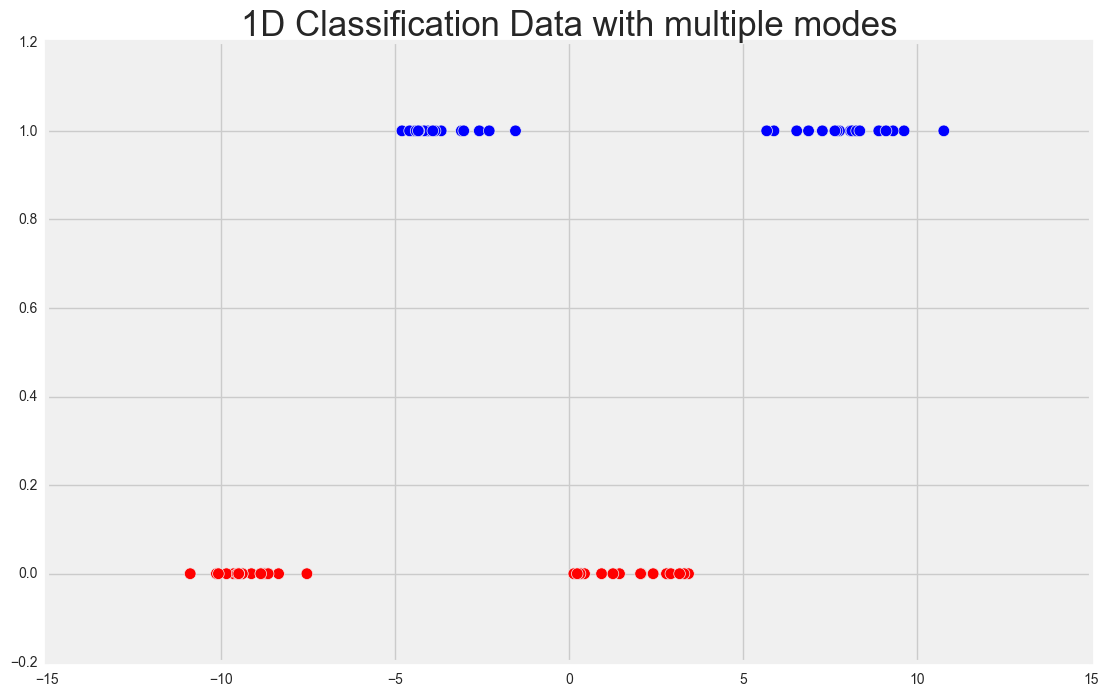

In [6]:
# Generate some polynomially-logistic data by funnily projecting 2D data to 1D:
X_data, y_data = make_classification(n_samples=40, n_features=2, n_classes=2, n_clusters_per_class=2, 
                                     n_informative=2, n_redundant=0, n_repeated=0, random_state=19)

d00 = np.array([(X_data.T[0][i] - 8, y_data[i])  for i in range(X_data.shape[0]) if y_data[i] == 0])
d01 = np.array([(X_data.T[0][i] - 5, y_data[i]) for i in range(X_data.shape[0]) if y_data[i] == 1])
d10 = np.array([(X_data.T[1][i] + 2, y_data[i]) for i in range(X_data.shape[0]) if y_data[i] == 0])
d11 = np.array([(X_data.T[1][i] + 8, y_data[i]) for i in range(X_data.shape[0]) if y_data[i] == 1])
X_poly = np.concatenate([d00.T[0], d01.T[0], d10.T[0], d11.T[0]])
y_poly = np.concatenate([d00.T[1], d01.T[1], d10.T[1], d11.T[1]])

# Plot the data:
plt.figure(figsize=(12,8))
plt.scatter(X_poly, y_poly, c=['r' if i==0 else 'b' for i in y_poly], s=70)

plt.title("1D Classification Data with multiple modes", fontsize=25);

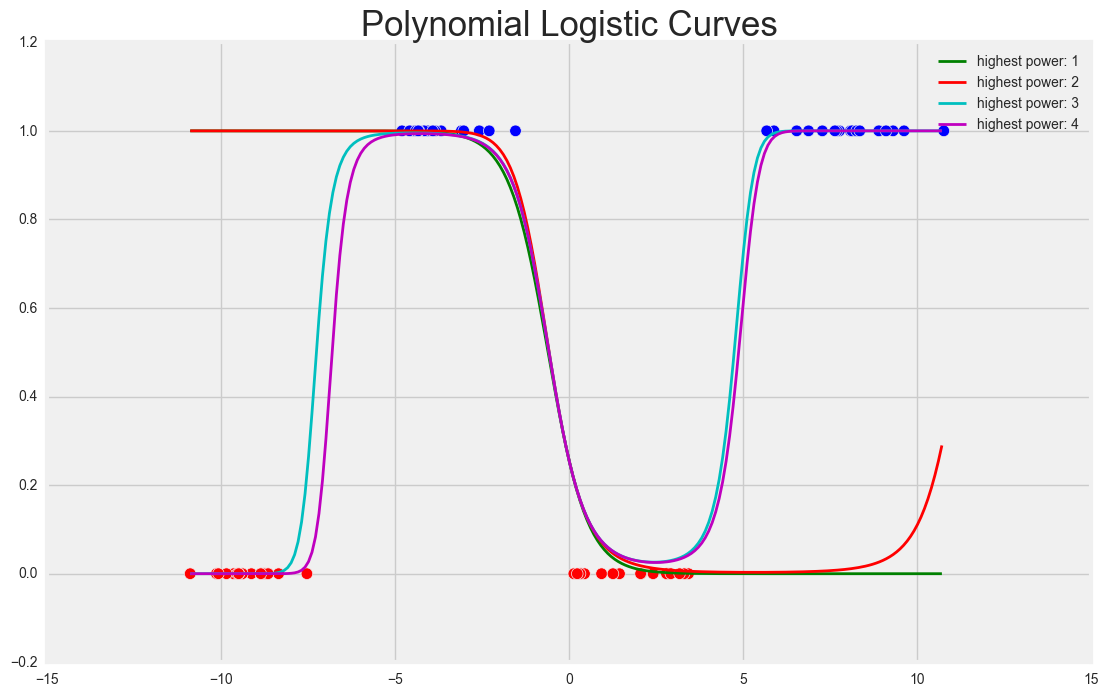

In [7]:
# Fit a logistic curve to this with different powers

X = np.array([X_poly, X_poly**2, X_poly**3, X_poly**4]).T

funcs = []
for i in range(1,5):
    model = LogisticRegression()
    model.fit(X[:,:i], y_poly)
    
    funcs.append(lambda x: 1/(1+np.exp(-sum([model.coef_[0][j] * x**(j+1) for j in range(i+1)]) - model.intercept_)))
    
# Plot the curves and data:
colors = ['g','r','c','m']

plt.figure(figsize=(12,8))
plt.scatter(X_poly, y_poly, c=['r' if i==0 else 'b' for i in y_poly], s=70)
for i, func in enumerate(funcs):
    plt.plot(np.arange(X[:,0].min(), X[:,0].max(), 0.1), 
             [func(j) for j in np.arange(X[:,0].min(), X[:,0].max(), 0.1)], 
             c=colors[i], linewidth=2, label="highest power: {}".format(i+1))

plt.legend()
plt.title("Polynomial Logistic Curves", fontsize=25);